<a href="https://colab.research.google.com/github/uchan21/2022smarkle-AI-study-/blob/main/%EC%86%90%EA%B8%80%EC%94%A8%20%EC%9D%B8%EC%8B%9D%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
import matplotlib.pyplot as plt
import numpy
import os
import sys
import tensorflow as tf

In [3]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [4]:
(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_train = X_train.astype('float32')
X_train = X_train /255

X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

In [6]:
Y_train = np_utils.to_categorical(Y_class_train)
Y_test = np_utils.to_categorical(Y_class_test)

In [7]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [9]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [12]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [13]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30,batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05445, saving model to ./model/01-0.0545.hdf5

Epoch 00002: val_loss improved from 0.05445 to 0.04027, saving model to ./model/02-0.0403.hdf5

Epoch 00003: val_loss improved from 0.04027 to 0.03456, saving model to ./model/03-0.0346.hdf5

Epoch 00004: val_loss improved from 0.03456 to 0.03162, saving model to ./model/04-0.0316.hdf5

Epoch 00005: val_loss did not improve from 0.03162

Epoch 00006: val_loss improved from 0.03162 to 0.03133, saving model to ./model/06-0.0313.hdf5

Epoch 00007: val_loss did not improve from 0.03133

Epoch 00008: val_loss improved from 0.03133 to 0.02898, saving model to ./model/08-0.0290.hdf5

Epoch 00009: val_loss did not improve from 0.02898

Epoch 00010: val_loss did not improve from 0.02898

Epoch 00011: val_loss did not improve from 0.02898

Epoch 00012: val_loss did not improve from 0.02898

Epoch 00013: val_loss improved from 0.02898 to 0.02892, saving model to ./model/13-0.0289.hdf5

Epoch 00014: val_lo

In [14]:
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 7s 23ms/step - loss: 0.0313 - accuracy: 0.9933

 Test Accuracy: 0.9933


In [15]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

<function matplotlib.pyplot.show>

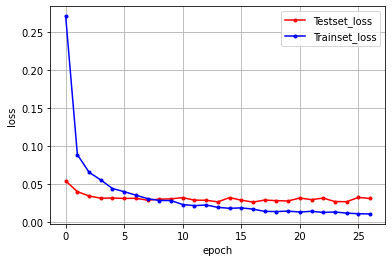

In [19]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show